<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 19** - November 9, 2016

- Laplacian eigenmaps
- MDS, Isomap, LLE

<hr/>

## Numpy's *newaxis*

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = np.array([1,2,3])#生成数组的套路

print repr(a)              # shape: (3,)
print repr(a[newaxis,:])   # shape: (1,3)
print repr(a[:,newaxis])   # shape: (3,1)

# pairwise differences
a[newaxis,:] - a[:,newaxis] # shape: (3,3)

array([1, 2, 3])
array([[1, 2, 3]])
array([[1],
       [2],
       [3]])


array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0]])

<h1><font color="darkblue">Spectral Methods</font></h1>


- Spectral embedding

> Construct the (latent) coordinates based on a given "similarity" graph or matrix
> 

- Spectral clustering

> Use these new coordinates as input to the usual methods <br>
> E.g., simple thresholding, K-means clustering

## Adjacency Matrix

- Are two objects "close"? Are the vertices connected?

> Encode it in an $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$


## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- Interesting property

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 $ 

## Minimization

- Solution: smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution (constant) <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations


### Example in Matlab

> If interested, also check out the Matlab code and documentation at
> https://www.cs.purdue.edu/homes/dgleich/demos/matlab/spectral/spectral.html

## Step by step

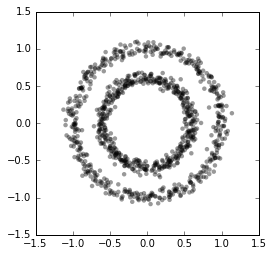

In [3]:
from sklearn import datasets
np.random.seed(3) # try other seeds, e.g., 0

X, c = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.05)#圆形点集

figure(); 
subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], c='k', alpha=0.4, edgecolor='none');

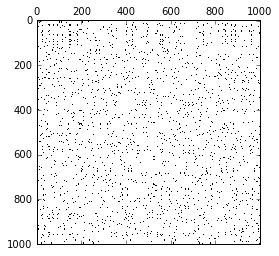

In [4]:
d =  X[newaxis,:,:] - X[:,newaxis,:]#求二维点距离
d2 = (d*d).sum(axis=2)#平方再加和
A = (d2<0.04).astype(np.float) # distance threshold判断,得0/1
np.fill_diagonal(A,0); #用0填充对角线
spy(A);

[  2.01503615e-15   3.81643875e-02   1.81071962e-01]
(3L,) (1000L, 3L)


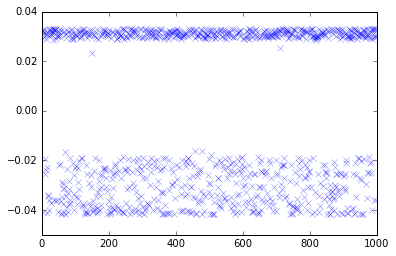

In [5]:
from scipy.linalg import eigh # different solvers
from scipy.sparse.linalg import eigsh

D = A.sum(axis=0)#按x轴加和
D = diag(D)

L = D - A#Laplacian

w, v = eigsh(L, 3, which='SA', tol=1e-2)#最小的,3个,tol-accuracy

print w[0:4]#由于算法，会变
print w.shape, v.shape
#plot(w)

figure()
plot(v[:,1], 'x', alpha=0.5);

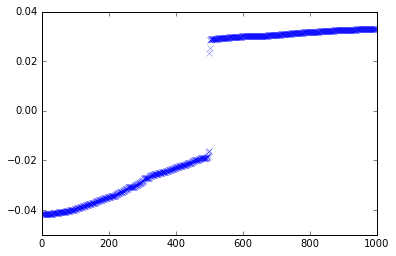

In [6]:
s = argsort(v[:,1])
plot(v[s,1], 'x', alpha=0.5);

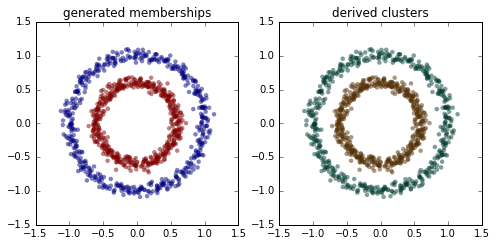

In [7]:
labels = (v[:,1] < 0)#按特征值贴标签,分类

figure(figsize=(8,9)); 
subplot(121,aspect='equal'); 
scatter(X[:,0], X[:,1], c=c, alpha=0.5, edgecolor='none'); title('generated memberships');#默认cmap
subplot(122,aspect='equal'); 
scatter(X[:,0], X[:,1], c=labels, cmap=cm.BrBG, alpha=0.5, edgecolor='none'); title('derived clusters');#cm.brbg一种色谱

## Using weights

- Instead of the 0/1 in the adjacency matrix $A$, we use a weight matrix $W$

[ -8.55042296e-16   5.95166131e-02   7.74030224e-02]


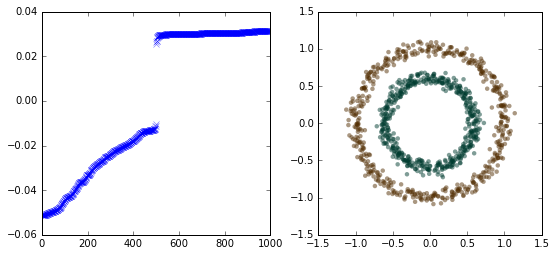

In [8]:
# Weight matrix 
d =  X[newaxis,:,:] - X[:,newaxis,:]
d2 = (d*d).sum(axis=2)#套路,看不懂
W = exp(-d2/0.016)#与A地位一致,算法不同
np.fill_diagonal(W,0)#对角线填充为0

# Laplacian
D = W.sum(axis=0)
D = diag(D)
L = D - W

# eigenproblem
w, v = eigsh(L, 3, which='SM') #SM,SA都是小,小的评价方式不同
labels = v[:,1] > 0
print w[:4]

# plots
figure(figsize=(9,4)); 
subplot(121);
s = argsort(v[:,1]); #sort a vector
plot(v[s,1], 'x', alpha=0.6);
subplot(122,aspect='equal')
scatter(X[:,0], X[:,1], c=labels, cmap=cm.BrBG, alpha=0.5, edgecolor='none');

## Embedding coordinates

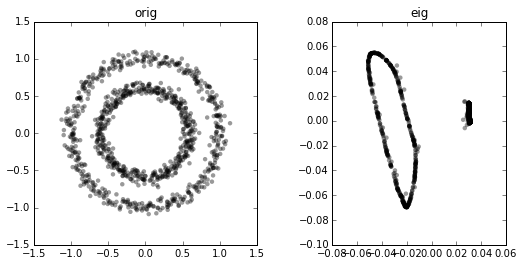

In [9]:
figure(figsize=(9,4)); 

subplot(121,aspect='equal');
scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); title('eig');#坐标变换

## Embedding with scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.spectral_embedding.html)



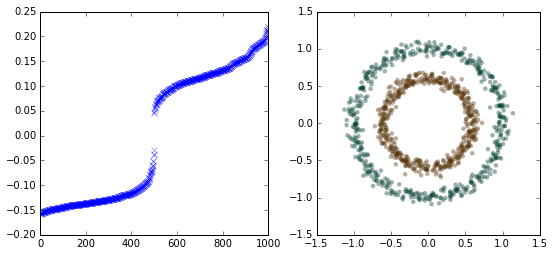

In [10]:
from sklearn.manifold import spectral_embedding
#现成的spectral-embedding
v = spectral_embedding(adjacency=W, n_components=3, 
                       eigen_solver='arpack', 
                       drop_first=False)
s = argsort(v[:,1]) 

figure(figsize=(9,4)) 
subplot(121); plot(v[s,1], 'xb', alpha=0.6)
subplot(122, aspect='equal')
scatter(X[:,0],X[:,1],c=(v[:,1]>0),cmap=cm.BrBG,edgecolor='none',alpha=0.4);

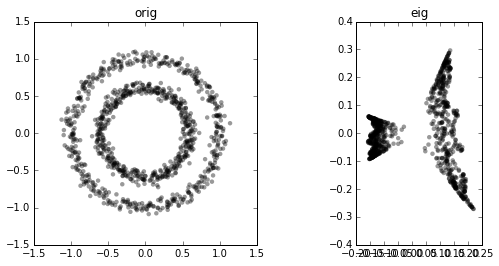

In [11]:
figure(figsize=(9,4)); 

subplot(121,aspect='equal')
scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); title('eig');

## Alternatively

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html)


In [12]:
from sklearn.manifold import SpectralEmbedding
#another S.E.
se = SpectralEmbedding(n_components=3, n_neighbors=20)

e = se.fit_transform(X)#得特征向量

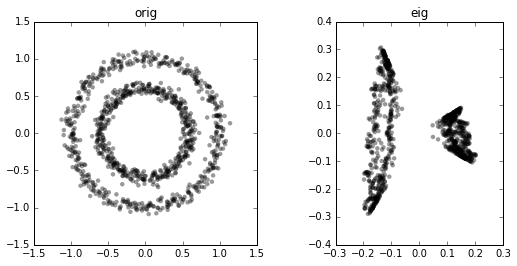

In [13]:
figure(figsize=(9,4)); 

subplot(121,aspect='equal')
scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(e[:,0],e[:,1],c='k',edgecolor='none',alpha=0.4); title('eig');

## Parameters

- Often we use a combination of two parameters

> $k$: number of neighbors to consider for similarity graph

> $\epsilon$: bandwidth of the $\exp(-d^2/\epsilon)$ similarity

## Clustering scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)

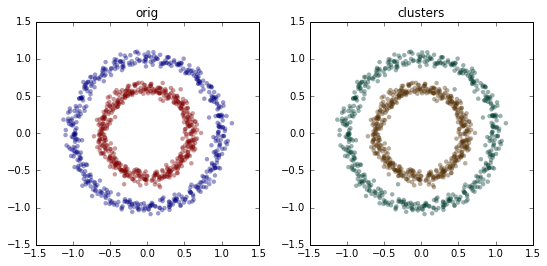

In [40]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2,gamma=100)#gamma注意
clusters = sc.fit_predict(X)#贴标签

figure(figsize=(9,4)); 

subplot(121,aspect='equal')
scatter(X[:,0],X[:,1],c=c,edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(X[:,0],X[:,1],c=clusters,cmap=cm.BrBG,edgecolor='none',alpha=0.4); title('clusters');

## Exercise

> What's wrong with the above clustering?

> Read the documentation and fix the code

## MDS 

- Metric Multidimensional Scaling

> Find the latent Euclidean coordinates <br>
to match a given distance matrix

- Formally what are the $\{x_k\}$ vectors in $\mathbb{R}^d$ s.t.

>$ d_{ij} = |\!| x_i - x_j |\!| \ \ \ $ for all $i$ and $j$


## Isomap

- Isometric feature mapping

> Use geodesic distance on the neighborhood graph

- Run MDS on that

> Embedding with Euclidean distances approximating the geodesics




### Algorithm

- Neigborhood graph 

> Find $\{x_k\}$ objects within $\epsilon$ distance or $k$ nearest neighbors of all points,
>$\epsilon$-Isomap or $k$-Isomap <br>

> Assign $d_G(i,j)=d_X(i,j)$ distances to edges between neighbors and initialize other elements to $\infty$

- Find shortest paths, e.g., by repeating

>$ d_G(i,j) = \min \Big\{ d_G(i,j),\ \big[d_G(i,k)\!+\!d_G(k,j)\big] \Big\}$

- Low-dimensional embedding

> To approximate the $d_G(i,j)$ for all $i$ and $j$

<img src=http://cnx.org/resources/12c857576a3c98d974030ec4887c4a07faee03e7/isomap.jpg align=left width=600>

## LLE

- Locally-Linear Embedding

> Linear combination of neighbors

- Based on the weights only

> Create lower-dimensional coordinates <br>
with similar linear combinations




<img src=https://www.cs.nyu.edu/~roweis/lle/images/llef2med.gif align=left width=350>